In [1]:
# Project part from Jesus 

In [2]:
import pandas as pd
import numpy as np


In [3]:
# Load the Dataset
df = pd.read_csv("king_ country_ houses_aa.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df = df.drop("date", axis=1)
df = df.drop("zipcode", axis=1)
#The date column was removed because it is not a structural feature and could add noise.
#The model predicts house prices using only physical and locational characteristics.

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Check dataset structure
display(df.head())

# Count the NULL values in total
display(df.isnull().sum())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

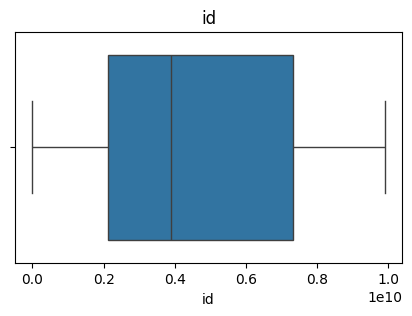

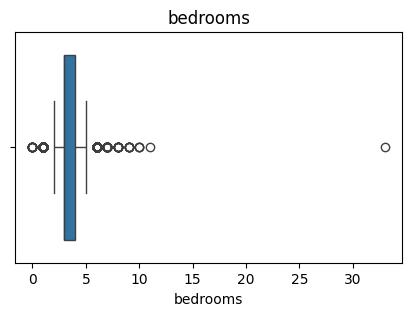

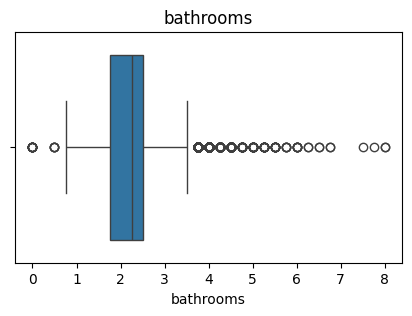

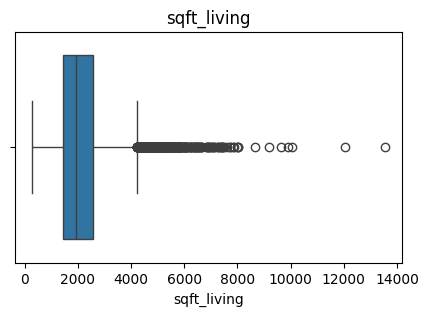

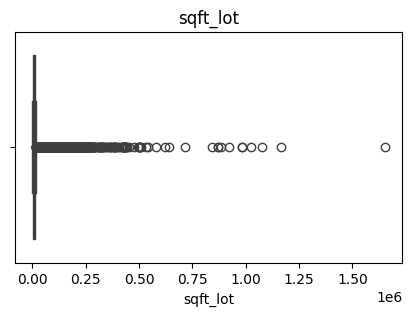

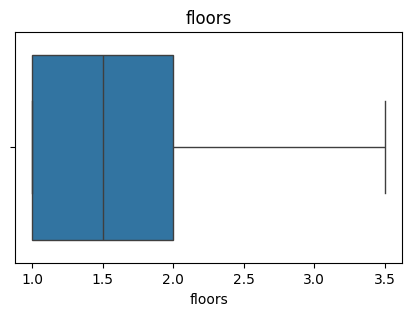

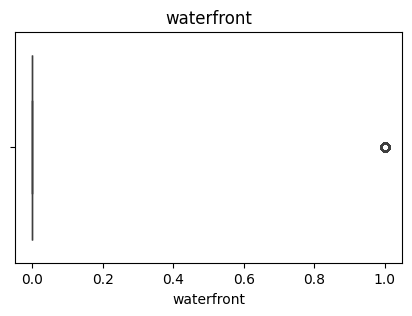

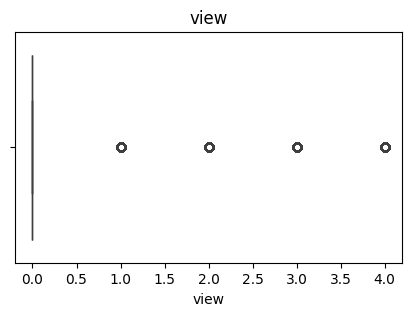

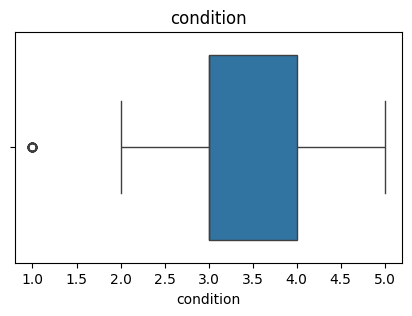

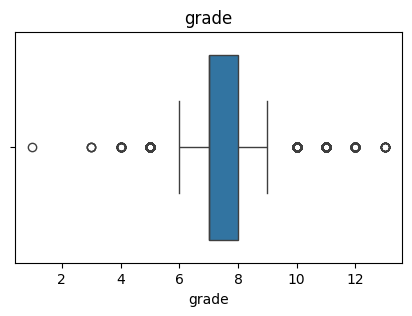

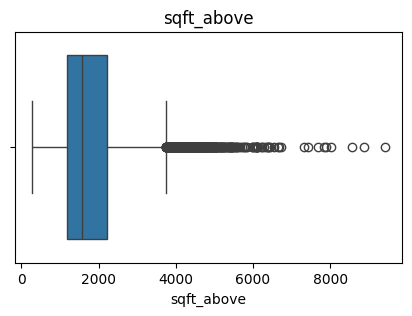

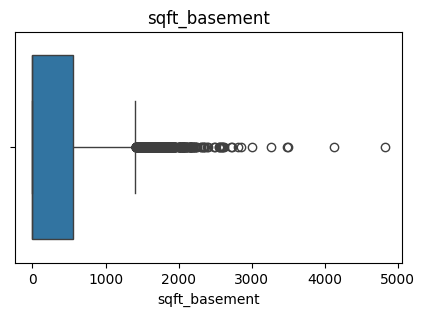

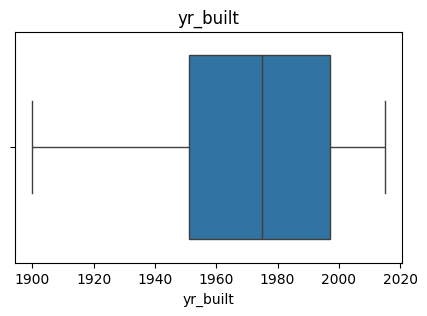

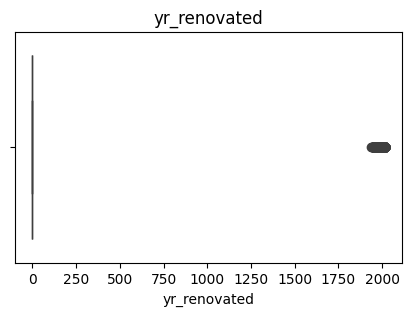

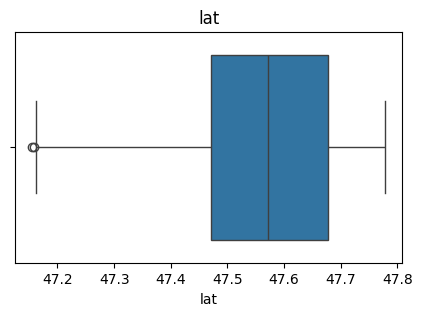

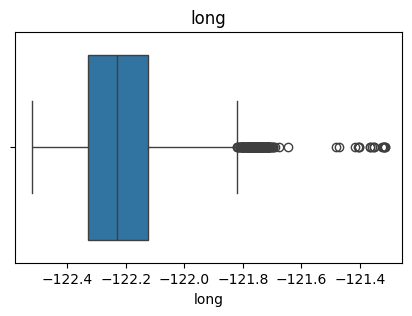

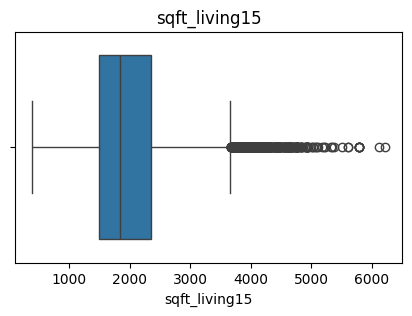

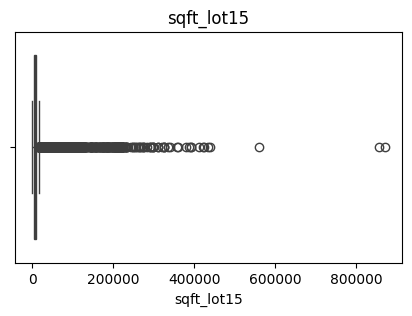

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.drop("price", axis=1).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [8]:
# Remove outliers
df = df[df['bedrooms'] <= 10]
df = df[df['condition'] != 1]

limits = {
    'bathrooms': 7,
    'sqft_above': 7000,
    'sqft_basement': 4000,
    'sqft_living15': 6000,
    'sqft_lot': 500000,
    'sqft_lot15': 500000
}

for col, limit in limits.items():
    df = df[df[col] <= limit]

In [9]:
# Feature engineering
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']
df['bath_per_bed'] = df['bathrooms'] / df['bedrooms']
df['living_ratio'] = df['sqft_living'] / df['sqft_lot']


In [10]:
# Log transformation for skewed features
for col in ['sqft_lot', 'sqft_lot15']:
    df[col] = np.log1p(df[col])

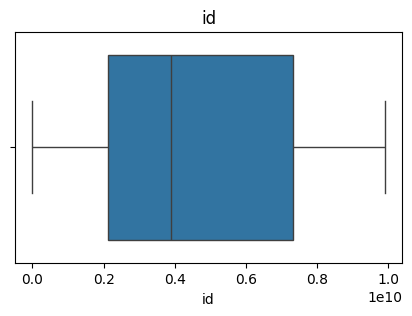

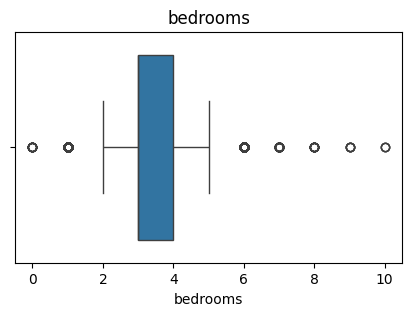

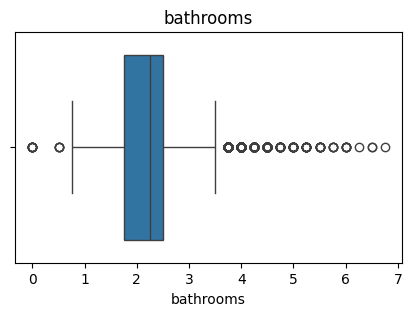

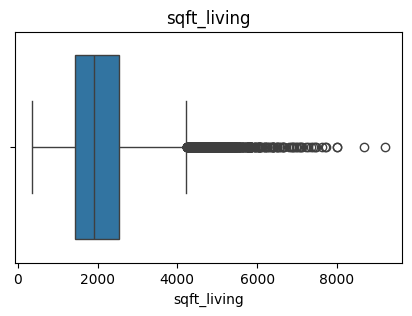

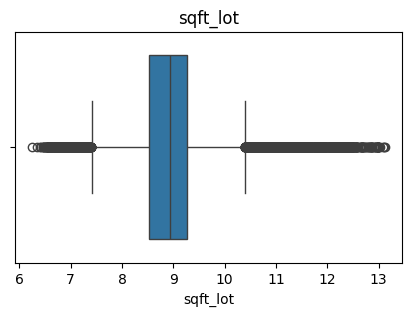

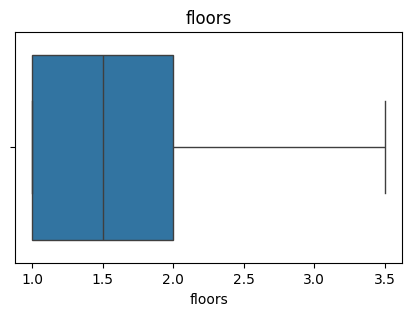

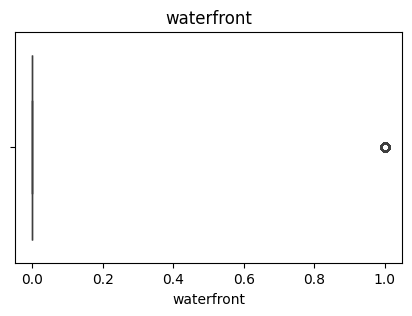

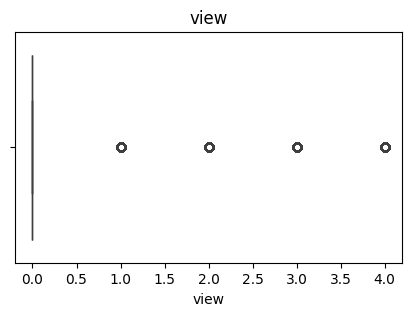

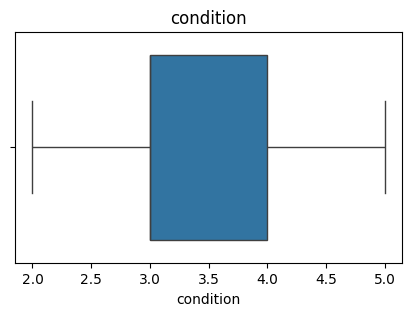

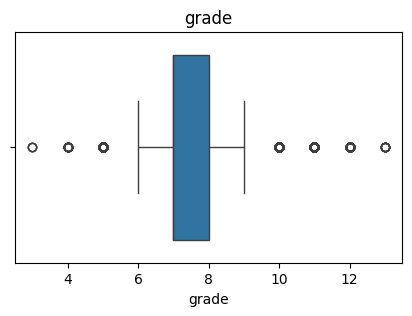

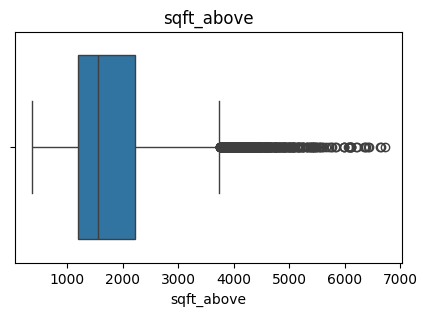

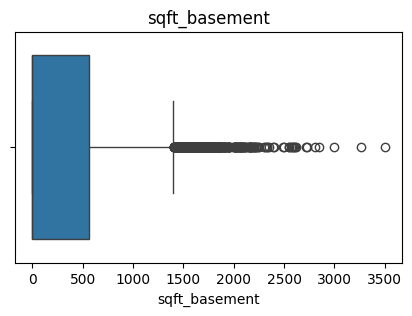

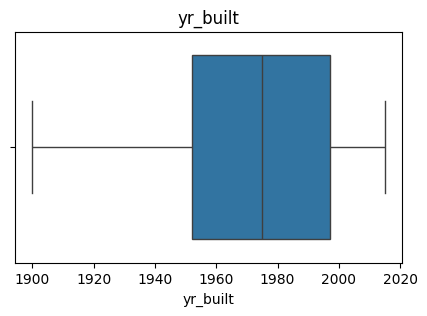

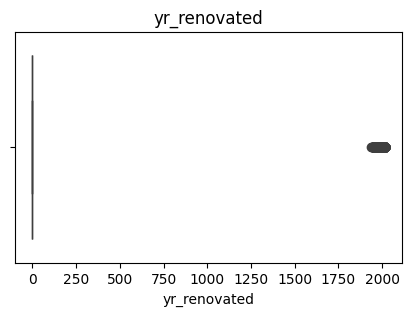

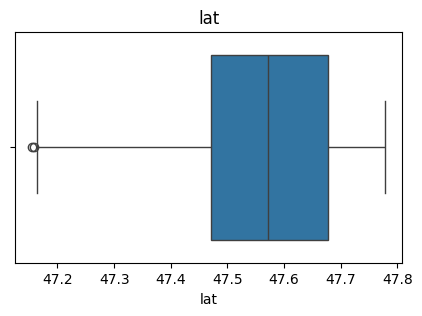

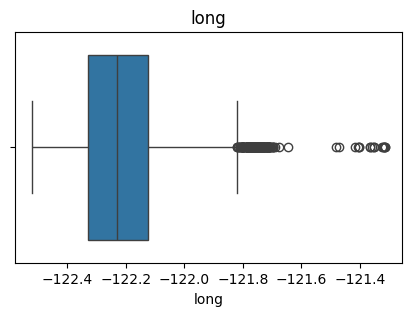

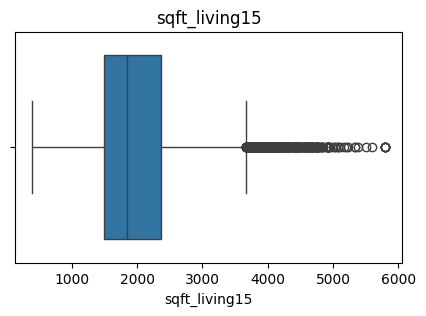

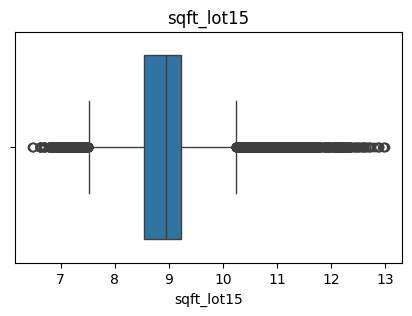

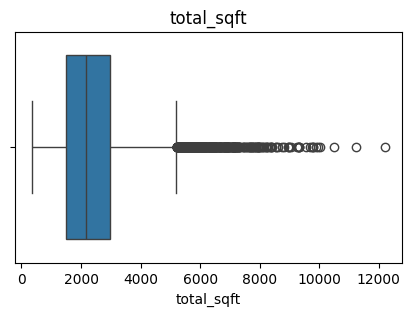

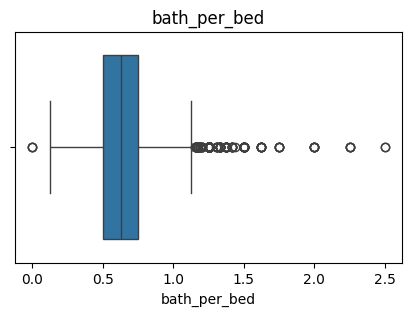

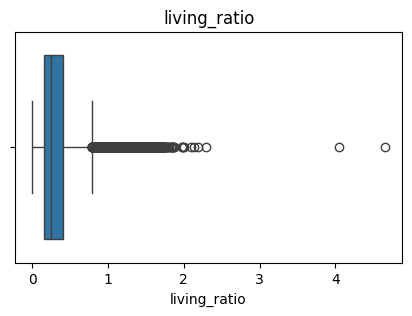

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.drop("price", axis=1).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [12]:
# Features
X = df.drop("price", axis=1)
# Target
y = df["price"]

# Date will be turn as an array of numbers
X = pd.get_dummies(X, drop_first = True )


In [13]:
# Train the split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



 

In [14]:
# Handle infinities or NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)  # Use train mean for test



In [15]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:

# Use KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print("R2:", r2)
print("MSE:", mse)


R2: 0.766691535612468
MSE: 28922180880.82714


In [17]:
# Evaluate different K
errors = {}
for k in range(1, 31):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    errors[k] = mean_squared_error(y_test, y_pred)
    print(f"k={k} → R2={r2_score(y_test, y_pred):.4f}, MSE={mean_squared_error(y_test, y_pred):.2f}")
errors

k=1 → R2=0.6258, MSE=46385463206.53
k=2 → R2=0.7121, MSE=35688981525.64
k=3 → R2=0.7474, MSE=31307493094.34
k=4 → R2=0.7630, MSE=29375768021.14
k=5 → R2=0.7667, MSE=28922180880.83
k=6 → R2=0.7677, MSE=28796781847.37
k=7 → R2=0.7731, MSE=28132144119.59
k=8 → R2=0.7791, MSE=27388438023.75
k=9 → R2=0.7773, MSE=27607162501.76
k=10 → R2=0.7786, MSE=27442797789.92
k=11 → R2=0.7756, MSE=27814259607.53
k=12 → R2=0.7729, MSE=28155169622.54
k=13 → R2=0.7703, MSE=28472782471.66
k=14 → R2=0.7722, MSE=28239556022.14
k=15 → R2=0.7741, MSE=27999384896.46
k=16 → R2=0.7729, MSE=28155582520.86
k=17 → R2=0.7727, MSE=28180624340.13
k=18 → R2=0.7715, MSE=28323502784.01
k=19 → R2=0.7701, MSE=28498551029.66
k=20 → R2=0.7683, MSE=28723976258.48
k=21 → R2=0.7647, MSE=29164159818.46
k=22 → R2=0.7636, MSE=29308829585.98
k=23 → R2=0.7630, MSE=29381758509.05
k=24 → R2=0.7643, MSE=29219420692.52
k=25 → R2=0.7633, MSE=29343975538.64
k=26 → R2=0.7617, MSE=29543190927.03
k=27 → R2=0.7626, MSE=29424907047.53
k=28 → R2=

{1: 46385463206.5297,
 2: 35688981525.63585,
 3: 31307493094.341663,
 4: 29375768021.140488,
 5: 28922180880.82714,
 6: 28796781847.369164,
 7: 28132144119.591335,
 8: 27388438023.745834,
 9: 27607162501.763966,
 10: 27442797789.916004,
 11: 27814259607.527893,
 12: 28155169622.539124,
 13: 28472782471.660107,
 14: 28239556022.140152,
 15: 27999384896.45694,
 16: 28155582520.861458,
 17: 28180624340.130657,
 18: 28323502784.01473,
 19: 28498551029.664684,
 20: 28723976258.480194,
 21: 29164159818.459385,
 22: 29308829585.980423,
 23: 29381758509.04999,
 24: 29219420692.518505,
 25: 29343975538.643204,
 26: 29543190927.03194,
 27: 29424907047.533207,
 28: 29636004189.292427,
 29: 29682261087.414474,
 30: 29855640158.815235}